In [1]:
# ==============imports===================
import pandas as pd
import os

import matplotlib.pyplot as plt

import matplotlib.ticker as mtick
import seaborn as sns

In [2]:
# ==================args=====================
# checkpoints = ['50000', '100000', '150000', '200000']
# checkpoints = ['1000', '10000', '100000', '200000', '300000', '400000', '500000', '600000']
# checkpoints = ['1000', '100000', '200000', '300000', '400000', '600000']

# plt.style.use('ggplot')

{'Gender': {'best': 0.2385714285714285, '1000': 0.0735714285714285, '100000': 0.1385714285714286, '200000': 0.1635714285714285, '300000': 0.1892857142857142, '400000': 0.1957142857142857, '600000': 0.0578571428571428}, 'Number': {'best': 0.1974545454545454, '1000': 0.0712727272727272, '100000': 0.1283636363636363, '200000': 0.1567272727272727, '300000': 0.1556363636363636, '400000': 0.168, '600000': 0.0512727272727272}, 'POS': {'best': 0.1351282051282051, '1000': 0.0594871794871794, '100000': 0.0882051282051282, '200000': 0.0946153846153846, '300000': 0.1205128205128205, '400000': 0.1328205128205128, '600000': 0.0435897435897435}}
[1000, 100000, 200000, 300000, 400000, 600000]
dict_values([0.0735714285714285, 0.1385714285714286, 0.1635714285714285, 0.1892857142857142, 0.1957142857142857, 0.0578571428571428])
[1000, 100000, 200000, 300000, 400000, 600000]
dict_values([0.0712727272727272, 0.1283636363636363, 0.1567272727272727, 0.1556363636363636, 0.168, 0.0512727272727272])
[1000, 10000

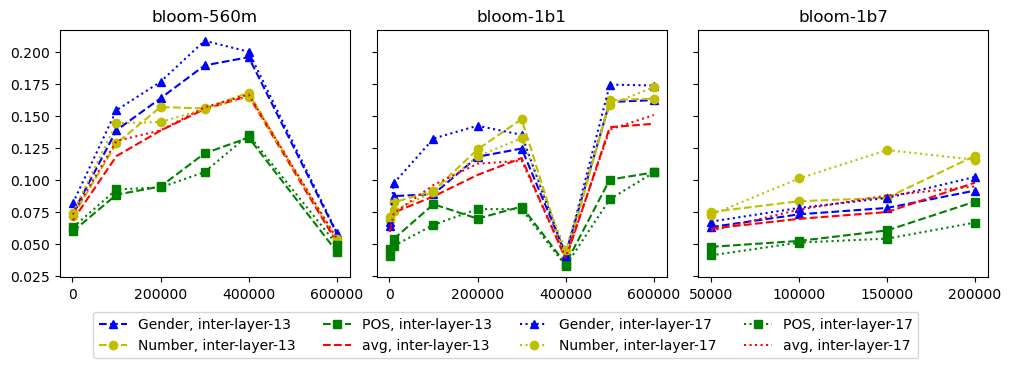

In [6]:
# ======================#1 alignment plot#==============================
fig, axs = plt.subplots(1, 3, sharex=False, sharey=True, layout="constrained", figsize=(10,3))
model_index = 0
for model in ['bloom-560m', 'bloom-1b1', 'bloom-1b7']:

    lines = ['--', ':']
    line_index = 0
    for l in ['inter-layer-13', 'inter-layer-17']:


        ovlp_dict = pd.read_csv(f'csv_files/{model}_{l}_avg-ovlp-rate-by-ctgr.csv', index_col=0).to_dict()

        print(ovlp_dict)
        shapes = {'Gender':'^', 'Number':'o', 'POS':'s'}
        colors = {'Gender':'b', 'Number':'y', 'POS':'g'}
        attr_index = 0
        for attr, avg_ovlp_rate in ovlp_dict.items():
            del avg_ovlp_rate['best']
            x = [int(x) for x in avg_ovlp_rate.keys()]
            y = avg_ovlp_rate.values()
            print(x)
            print(y)
            axs[model_index].plot(x, y, f"{colors[attr]}{shapes[attr]}{lines[line_index]}", label=f'{attr}, {l}')
            axs[model_index].set_title(model)
            attr_index += 1


        with open(f'csv_files/{model}_{l}_avg-ovlp-rate-by-ckpt.txt', 'r') as f:
            read_lines = f.readlines()
            avg_ovlp_dict = {}
            for line in read_lines:
                list = line.split(',')
                if list[0] == 'best':
                    continue
                avg_ovlp_dict[int(list[0])] = float(list[1])
            ckpts, avg_ovlps = zip(*avg_ovlp_dict.items())
            axs[model_index].plot(ckpts, avg_ovlps, f"r{lines[line_index]}", label=f'avg, {l}')
        line_index += 1
    
    model_index += 1

labels_handles = {
  label: handle for ax in fig.axes for handle, label in zip(*ax.get_legend_handles_labels())
}

fig.legend(
  labels_handles.values(),
  labels_handles.keys(),
  loc = "upper center",
   bbox_to_anchor = (0.5, 0),
   bbox_transform = plt.gcf().transFigure,
   ncol=4
)

plt.savefig(f'experiments/scatterplots/alignment.pdf', bbox_inches='tight')

In [4]:
# ===========================read overlap ratios============================


[1000, 100000, 200000, 300000, 400000, 600000]
dict_values([0.4145209580838323, 0.5692864271457085, 0.5034181636726547, 0.6194860279441118, 0.4908433133732535, 0.3527944111776447])
[1000, 100000, 200000, 300000, 400000, 600000]
dict_values([0.30007194456874814, 0.4308753123748261, 0.461252566644333, 0.45239087982412124, 0.4345825403835825, 0.22342748787736103])
[1000, 10000, 100000, 200000, 300000, 400000, 500000, 600000]
dict_values([0.45870758483033935, 0.5370508982035929, 0.5627744510978044, 0.5250499001996008, 0.6133483033932136, 0.348877245508982, 0.5814121756487026, 0.5572355289421158])
[1000, 10000, 100000, 200000, 300000, 400000, 500000, 600000]
dict_values([0.3074196725188019, 0.43251572776486985, 0.4300463483947969, 0.43556286714715436, 0.43496597307387924, 0.22640293104572648, 0.45791864020136336, 0.44429074297217036])
[50000, 100000, 150000, 200000]
dict_values([0.5707584830339322, 0.6082335329341317, 0.6108033932135728, 0.5910429141716567])
[50000, 100000, 150000, 200000]


/tmp/ipykernel_1488/2157080346.py:38: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axs_dup[model_index].get_shared_y_axes().join(axs_dup[model_index], axs_dup[model_index+1])
/tmp/ipykernel_1488/2157080346.py:38: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axs_dup[model_index].get_shared_y_axes().join(axs_dup[model_index], axs_dup[model_index+1])


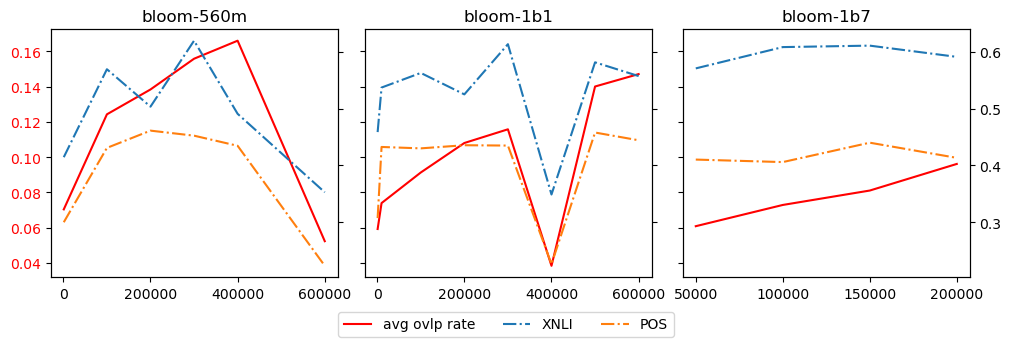

In [43]:
# ======================#2 correlation plot - curve#==============================
fig, axs = plt.subplots(1, 3, sharex=False, sharey=True, layout="constrained", figsize=(10,3))
model_index = 0
axs_dup = [ax.twinx() for ax in axs]
for model in ['bloom-560m', 'bloom-1b1', 'bloom-1b7']:
    avg_alignment = {}
    for l in ['inter-layer-13', 'inter-layer-17']:

        with open(f'csv_files/{model}_{l}_avg-ovlp-rate-by-ckpt.txt', 'r') as f:
            read_lines = f.readlines()
            avg_ovlp_dict = {}
            for line in read_lines:
                list = line.split(',')
                if list[0] == 'best':
                    continue
                if int(list[0]) not in avg_alignment:
                    avg_alignment[int(list[0])] = 0
                avg_alignment[int(list[0])] += float(list[1])

    for k, v in avg_alignment.items():
        avg_alignment[k] = v/2
            
    ckpts, avg_ovlps = zip(*avg_alignment.items())
    axs[model_index].plot(ckpts, avg_ovlps, "r-", label='avg ovlp rate')

    task_name_dict = {"XNLI": 'xnli_acc', "POS": 'f1-score'}
    for task in ["XNLI", "POS"]:
        score_dict = pd.read_csv(f'csv_files/{model}_{task_name_dict[task]}.csv', index_col=0)
        avg_scores = score_dict.mean(axis=0).to_dict()
        if 'best' in avg_scores:
            del avg_scores['best']
        x = [int(k) for k in avg_scores.keys()]
        y = avg_scores.values()
        print(x)
        print(y)
        axs_dup[model_index].plot(x, y, "-.", label=task)     
    if model_index < 2:
        axs_dup[model_index].get_shared_y_axes().join(axs_dup[model_index], axs_dup[model_index+1])
    axs[model_index].set_title(model)
    axs[model_index].tick_params(axis='y', labelcolor='red')
    model_index += 1

axs_dup[0].set_yticklabels([])
axs_dup[1].set_yticklabels([])

labels_handles = {
  label: handle for ax in fig.axes for handle, label in zip(*ax.get_legend_handles_labels())
}

fig.legend(
  labels_handles.values(),
  labels_handles.keys(),
  loc = "upper center",
   bbox_to_anchor = (0.5, 0),
   bbox_transform = plt.gcf().transFigure,
   ncol=3
)

plt.savefig(f'experiments/scatterplots/crslgual_curve.pdf', bbox_inches='tight')

[1000, 100000, 200000, 300000, 400000, 600000]
dict_values([0.4145209580838323, 0.5692864271457085, 0.5034181636726547, 0.6194860279441118, 0.4908433133732535, 0.3527944111776447])
[1000, 100000, 200000, 300000, 400000, 600000]
dict_values([0.30007194456874814, 0.4308753123748261, 0.461252566644333, 0.45239087982412124, 0.4345825403835825, 0.22342748787736103])
[1000, 10000, 100000, 200000, 300000, 400000, 500000, 600000]
dict_values([0.45870758483033935, 0.5370508982035929, 0.5627744510978044, 0.5250499001996008, 0.6133483033932136, 0.348877245508982, 0.5814121756487026, 0.5572355289421158])
[1000, 10000, 100000, 200000, 300000, 400000, 500000, 600000]
dict_values([0.3074196725188019, 0.43251572776486985, 0.4300463483947969, 0.43556286714715436, 0.43496597307387924, 0.22640293104572648, 0.45791864020136336, 0.44429074297217036])
[50000, 100000, 150000, 200000]
dict_values([0.5707584830339322, 0.6082335329341317, 0.6108033932135728, 0.5910429141716567])
[50000, 100000, 150000, 200000]


/tmp/ipykernel_1488/2157080346.py:38: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axs_dup[model_index].get_shared_y_axes().join(axs_dup[model_index], axs_dup[model_index+1])
/tmp/ipykernel_1488/2157080346.py:38: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axs_dup[model_index].get_shared_y_axes().join(axs_dup[model_index], axs_dup[model_index+1])


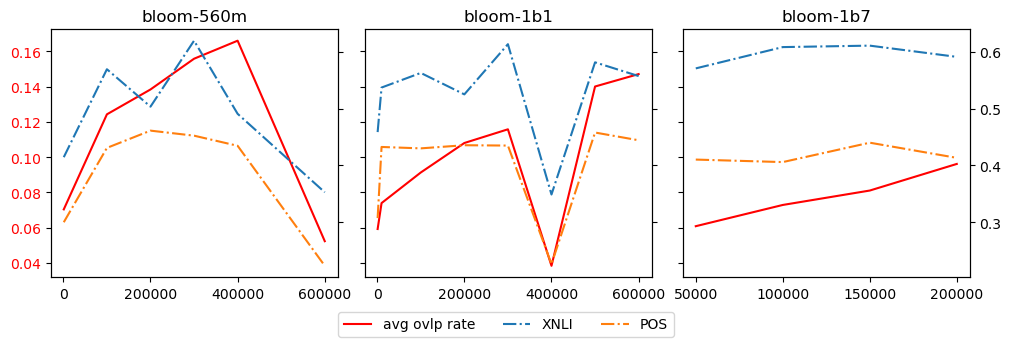

In [ ]:
# ======================#3 correlation plot - scatter#==============================
fig, axs = plt.subplots(1, 3, sharex=False, sharey=True, layout="constrained", figsize=(10,3))
model_index = 0

for model in ['bloom-560m', 'bloom-1b1', 'bloom-1b7']:
    avg_alignment = {}
    for l in ['inter-layer-13', 'inter-layer-17']:

        with open(f'csv_files/{model}_{l}_avg-ovlp-rate-by-ckpt.txt', 'r') as f:
            read_lines = f.readlines()
            avg_ovlp_dict = {}
            for line in read_lines:
                list = line.split(',')
                if list[0] == 'best':
                    continue
                if int(list[0]) not in avg_alignment:
                    avg_alignment[int(list[0])] = 0
                avg_alignment[int(list[0])] += float(list[1])

    for k, v in avg_alignment.items():
        avg_alignment[k] = v/2
            
    ckpts, avg_ovlps = zip(*avg_alignment.items())
    axs[model_index].plot(ckpts, avg_ovlps, "r-", label='avg ovlp rate')

    task_name_dict = {"XNLI": 'xnli_acc', "POS": 'f1-score'}
    for task in ["XNLI", "POS"]:
        score_dict = pd.read_csv(f'csv_files/{model}_{task_name_dict[task]}.csv', index_col=0)
        avg_scores = score_dict.mean(axis=0).to_dict()
        if 'best' in avg_scores:
            del avg_scores['best']
        x = [int(k) for k in avg_scores.keys()]
        y = avg_scores.values()
        print(x)
        print(y)
        axs_dup[model_index].plot(x, y, "-.", label=task)     
    if model_index < 2:
        axs_dup[model_index].get_shared_y_axes().join(axs_dup[model_index], axs_dup[model_index+1])
    axs[model_index].set_title(model)
    axs[model_index].tick_params(axis='y', labelcolor='red')
    model_index += 1

axs_dup[0].set_yticklabels([])
axs_dup[1].set_yticklabels([])

# labels_handles = {
#   label: handle for ax in fig.axes for handle, label in zip(*ax.get_legend_handles_labels())
# }

# fig.legend(
#   labels_handles.values(),
#   labels_handles.keys(),
#   loc = "upper center",
#    bbox_to_anchor = (0.5, 0),
#    bbox_transform = plt.gcf().transFigure,
#    ncol=3
# )

# plt.savefig(f'experiments/scatterplots/crslgual_curve.pdf', bbox_inches='tight')